# Predicting Travel Insurance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics

# Travel Insurance Dataset

In [2]:
df = pd.read_csv('TravelInsurancePrediction.csv')
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


Droping the column Unnamed in the dataset

In [3]:
df = df.drop('Unnamed: 0', axis = 1)

In [4]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


# Checking data set Imbalance

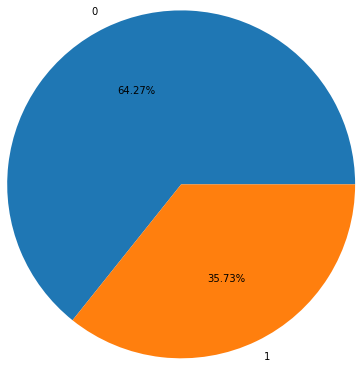

In [5]:
plt.pie(x = df['TravelInsurance'].value_counts(), labels = ['0', '1'], autopct = '%0.2f%%',radius = 2)
plt.show()

We can see that the dataset is imbalaced, where class 1 has 35.7% and class 2 has 64.27%..

Later in the model i will be using imblearn tool to make balanced dataset, so that our model will not get biased 



# Count class 1 and class 2

In [6]:
df['TravelInsurance'].value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

We can see that our dataset imbalanced were class 0 has 1277 and class 1 has 710

# Get info of the Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


# Check for missing values

In [8]:
df_na = [null for null in df.columns if df[null].isnull().sum()>1]
df_na

[]

No missing values in the dataset

In [9]:
df.isnull().value_counts()

Age    Employment Type  GraduateOrNot  AnnualIncome  FamilyMembers  ChronicDiseases  FrequentFlyer  EverTravelledAbroad  TravelInsurance
False  False            False          False         False          False            False          False                False              1987
dtype: int64

We can see that all our features doesn't have any missing

# Numerical Features

In [10]:
df_num = [num for num in df.columns if df[num].dtype != 'O']
print('The Numerical Features are \n',df_num)

The Numerical Features are 
 ['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'TravelInsurance']


In [11]:
df[df_num].head()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
0,31,400000,6,1,0
1,31,1250000,7,0,0
2,34,500000,4,1,1
3,28,700000,3,1,0
4,28,700000,8,1,0


# Discrete Features

In [12]:
df_dis = [dis for dis in df_num if len(df[dis].unique())<10 and dis not in 'TravelInsurance']
print('The Discrete Features \n',df_dis)

The Discrete Features 
 ['FamilyMembers', 'ChronicDiseases']


I had given that less then 10 unique values is considered as discrete features, the reason is that family members are only few unique , so i included family members as discrete by giving the threshold value 10

# Categorical features 

In [13]:
df_cat = [cat for cat in df.columns if df[cat].dtype == 'O']
print('The Categorical Features \n', df_cat)

The Categorical Features 
 ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']


In [14]:
df[df_cat].head()

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
0,Government Sector,Yes,No,No
1,Private Sector/Self Employed,Yes,No,No
2,Private Sector/Self Employed,Yes,No,No
3,Private Sector/Self Employed,Yes,No,No
4,Private Sector/Self Employed,Yes,Yes,No


# Continuous Features

In [15]:
df_con = [con for con in df_num if con not in df_cat + df_dis + ['TravelInsurance']]
print('The Categorical Features \n',df_con)

The Categorical Features 
 ['Age', 'AnnualIncome']


# Visualizing the Continuous Features

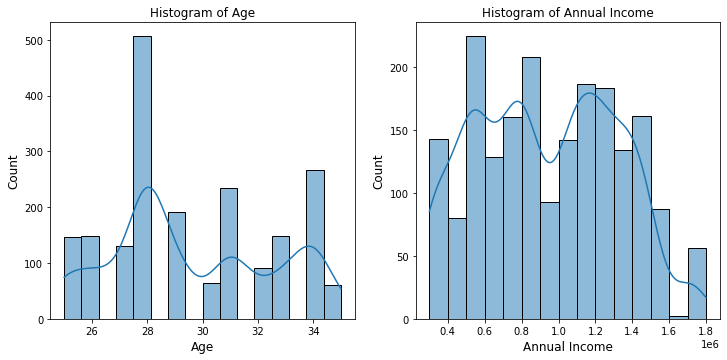

In [16]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.histplot(df['Age'], kde= True)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Histogram of Age', fontsize = 12)

plt.subplot(2,2,2)
sns.histplot(df['AnnualIncome'], kde=True)
plt.xlabel('Annual Income', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Histogram of Annual Income', fontsize = 12)
plt.show()

There is no skewness in the histogram, the data is normal distributed

# Box plot for continuous features

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


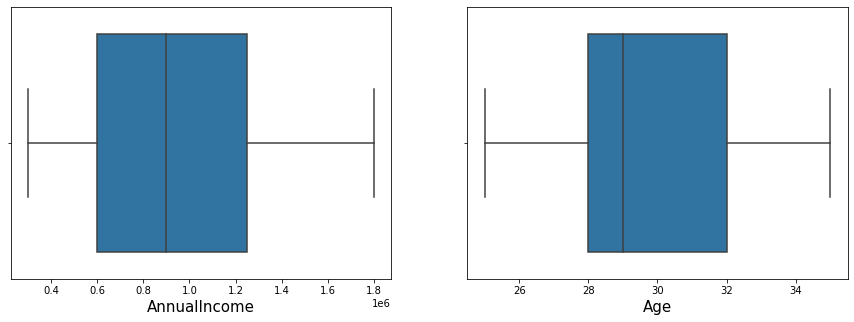

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(df['AnnualIncome'])
plt.xlabel('AnnualIncome', fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(df['Age'])
plt.xlabel('Age', fontsize = 15)
plt.show()

There is no outlier in the continuous features 

# Correlation

In [18]:
df.corr()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
Age,1.000000,-0.020101,0.027409,0.007359,0.061060
AnnualIncome,-0.020101,1.000000,-0.015367,-0.001149,0.396763
FamilyMembers,0.027409,-0.015367,1.000000,0.028209,0.079909
ChronicDiseases,0.007359,-0.001149,0.028209,1.000000,0.018190
TravelInsurance,0.061060,0.396763,0.079909,0.018190,1.000000


# visualizing the correlation 

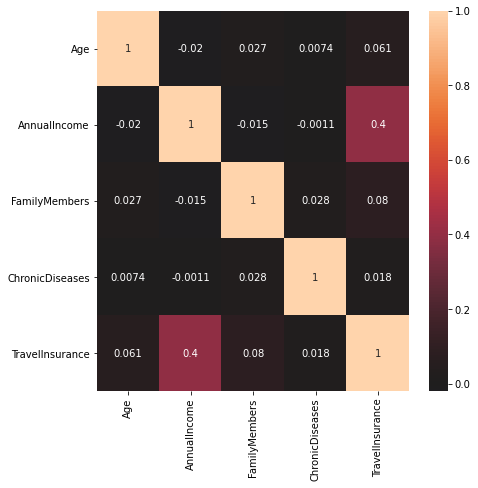

In [19]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot = True, center = 0)
plt.show()

The Annual income is highly correlated with travel insurance

# Added annual income group column

grpai = Grouped Annual income 

In [20]:
df['grpai'] = pd.cut(df['AnnualIncome'], [200000,400000,600000,1000000,1200000,1400000,1600000,1800000])
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,grpai
0,31,Government Sector,Yes,400000,6,1,No,No,0,"(200000, 400000]"
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0,"(1200000, 1400000]"
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1,"(400000, 600000]"
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0,"(600000, 1000000]"
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0,"(600000, 1000000]"


In [21]:
df['grpai'].value_counts()

(600000, 1000000]     551
(1000000, 1200000]    380
(400000, 600000]      337
(1200000, 1400000]    335
(200000, 400000]      208
(1400000, 1600000]    118
(1600000, 1800000]     58
Name: grpai, dtype: int64

# Visualizing of Annual income and Travel Income

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


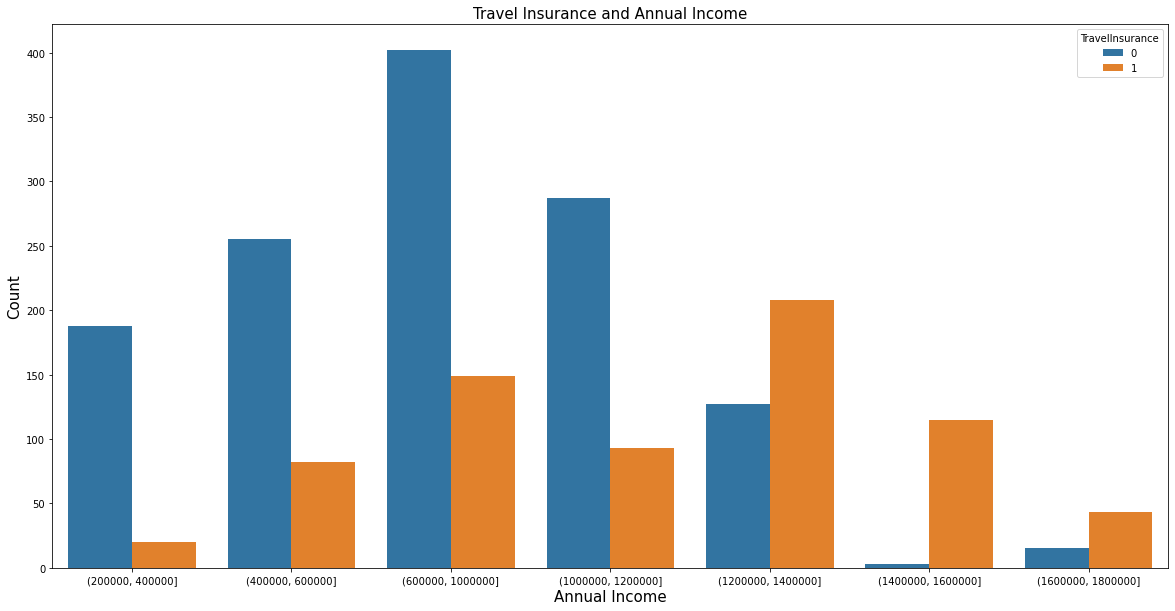

In [22]:
plt.figure(figsize=(20,10))
x = plt.gca()
sns.countplot('grpai', hue = 'TravelInsurance', data = df)
plt.xlabel('Annual Income', fontsize = 15)
plt.ylabel('Count',  fontsize = 15)
plt.title('Travel Insurance and Annual Income', fontsize = 15)
plt.show()

We can see that annual income above 1200000 has higher chance of getting travel insurance

#  Visualizing of Employment Type and Travel Income

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


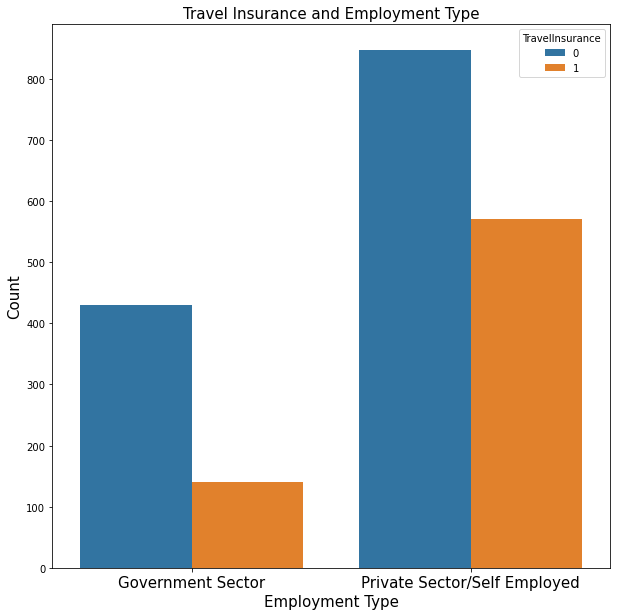

In [23]:
plt.figure(figsize=(10,10))
sns.countplot('Employment Type', hue = 'TravelInsurance', data = df)
plt.xlabel('Employment Type', fontsize = 15)
plt.ylabel('Count',  fontsize = 15)
plt.title('Travel Insurance and Employment Type', fontsize = 15)
x = plt.gca()
x.set_xticklabels(['Government Sector', 'Private Sector/Self Employed'], fontsize = 15)
plt.show()


we see that privatesector/self employed pepole getting higher chance of travel insurance

# Visualizing of Age and Travel Income

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


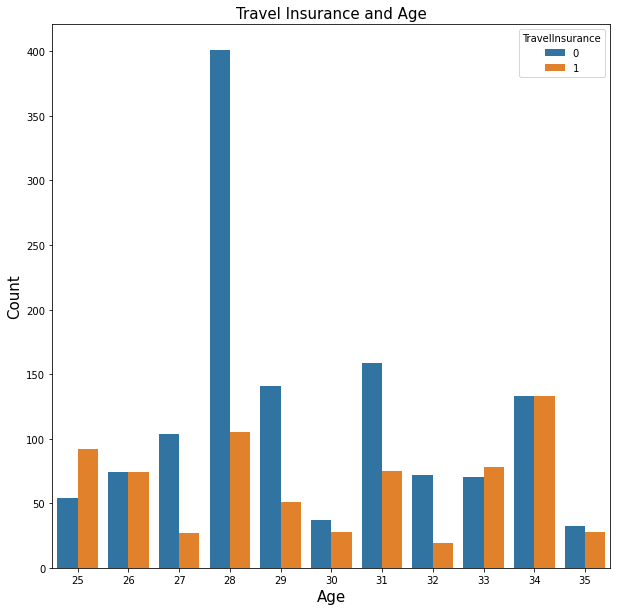

In [24]:
plt.figure(figsize=(10,10))
sns.countplot('Age', hue = 'TravelInsurance', data = df)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Count',  fontsize = 15)
plt.title('Travel Insurance and Age', fontsize = 15)
plt.show()


We can't say relation between age and chance of getting travel insurance

# Visualizing of Family Members and Travel Income

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


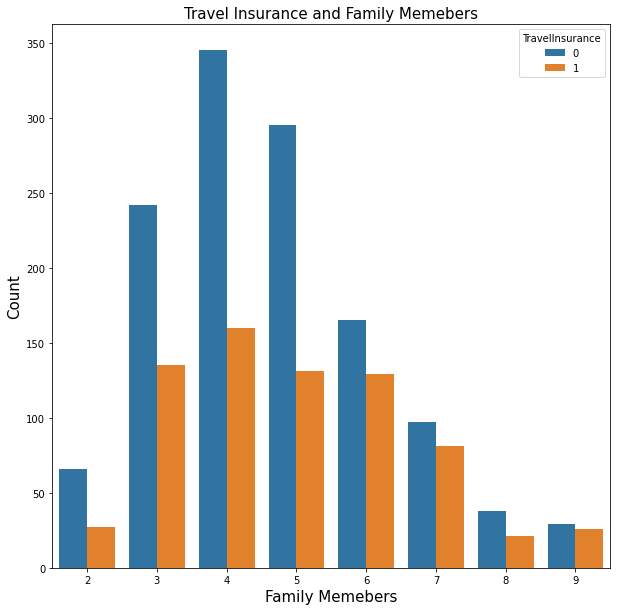

In [25]:
plt.figure(figsize=(10,10))
sns.countplot('FamilyMembers', hue = 'TravelInsurance', data = df)
plt.xlabel('Family Memebers', fontsize = 15)
plt.ylabel('Count',  fontsize = 15)
plt.title('Travel Insurance and Family Memebers', fontsize = 15)
plt.show()

we see that family members between 3 to 6 has some chance of getting travel insurance

# Visualizing of  ChronicDiseases and Travel Income

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


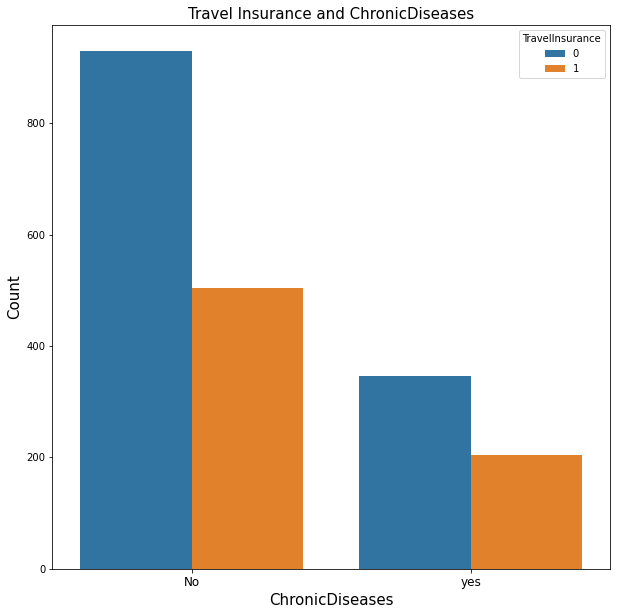

In [26]:
plt.figure(figsize=(10,10))
x = plt.gca()
sns.countplot('ChronicDiseases', hue = 'TravelInsurance', data = df)
plt.xlabel('ChronicDiseases', fontsize = 15)
plt.ylabel('Count',  fontsize = 15)
plt.title('Travel Insurance and ChronicDiseases', fontsize = 15)
x.set_xticklabels(['No', 'yes'], fontsize = 12)
plt.show()

we see that those who don't have diseases have higher chance of getting travel insurance

# Visualizing of GraduateOrNot and Travel Income



C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


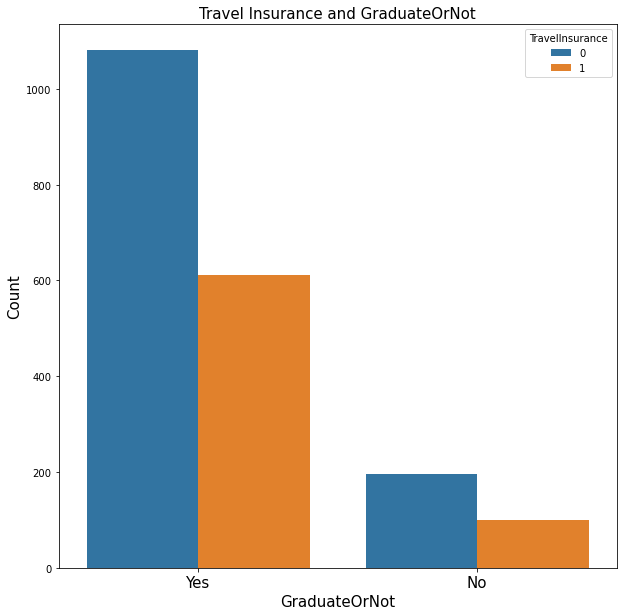

In [27]:
plt.figure(figsize=(10,10))
sns.countplot('GraduateOrNot', hue = 'TravelInsurance', data = df)
x = plt.gca()
plt.xlabel('GraduateOrNot', fontsize = 15)
plt.ylabel('Count',  fontsize = 15)
plt.title('Travel Insurance and GraduateOrNot', fontsize = 15)
x.set_xticklabels(['Yes', 'No'], fontsize = 15)
plt.show()

we see that graduated people has higher chance of getting travel insurance, the reason could be graducated people travel more

# Visualizing of  FrequentFlyer and Travel Income

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


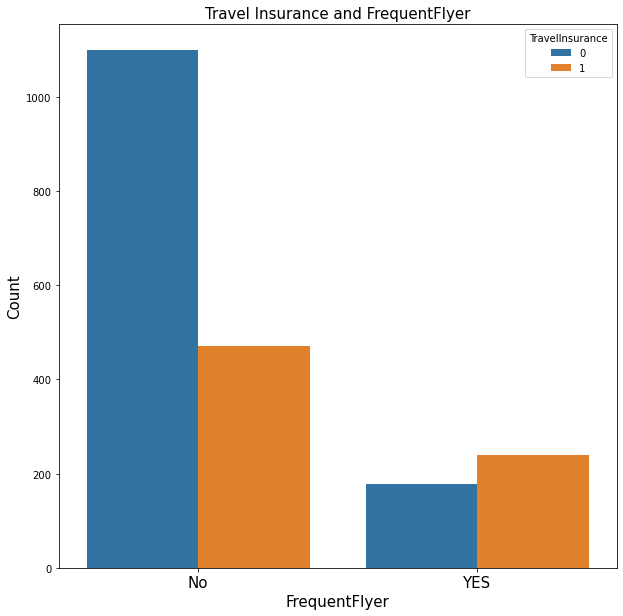

In [28]:
plt.figure(figsize=(10,10))
sns.countplot('FrequentFlyer', hue = 'TravelInsurance', data = df)
plt.xlabel('FrequentFlyer', fontsize = 15)
plt.ylabel('Count',  fontsize = 15)
plt.title('Travel Insurance and FrequentFlyer', fontsize = 15)
x = plt.gca()
x.set_xticklabels(['No', 'YES'], fontsize = 15)
plt.show()

The non frequent flyer has quite higher chance of getting travel insurance

# Visualizing of  EverTravelledAbroad and Travel Income

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


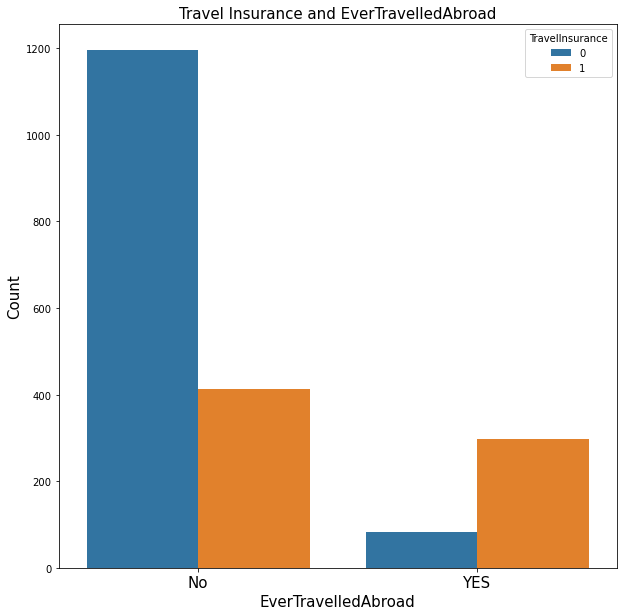

In [29]:
plt.figure(figsize=(10,10))
sns.countplot('EverTravelledAbroad', hue = 'TravelInsurance', data = df)
plt.xlabel('EverTravelledAbroad', fontsize = 15)
plt.ylabel('Count',  fontsize = 15)
plt.title('Travel Insurance and EverTravelledAbroad', fontsize = 15)
x = plt.gca()
x.set_xticklabels(['No', 'YES'], fontsize = 15)
plt.show()

Those who evertravel abroad has quite higher chance of getting travel insurance

# Visualizing employment type and frequentflyer

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


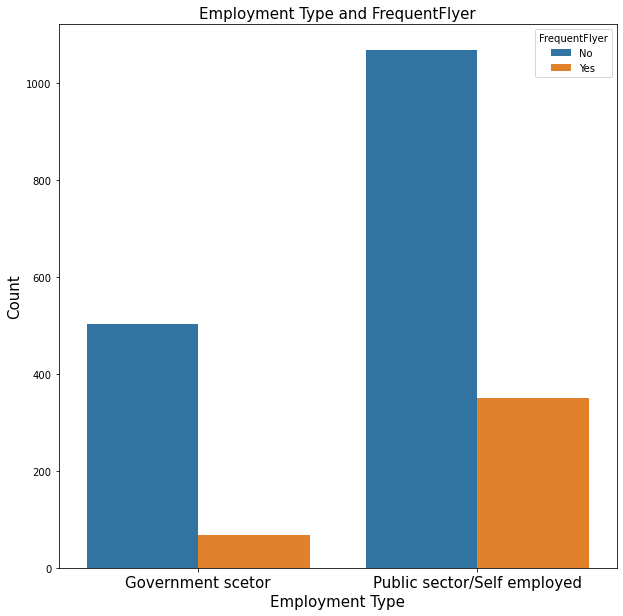

In [30]:
plt.figure(figsize=(10,10))
sns.countplot('Employment Type', hue = 'FrequentFlyer', data = df)
plt.xlabel('Employment Type', fontsize = 15)
plt.ylabel('Count',  fontsize = 15)
plt.title('Employment Type and FrequentFlyer', fontsize = 15)
x = plt.gca()
x.set_xticklabels(['Government scetor', 'Public sector/Self employed'], fontsize = 15)
plt.show()

Public sector people are frequentflyer when compare to government sector

# Visualizing Employment Type and Annual Income

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


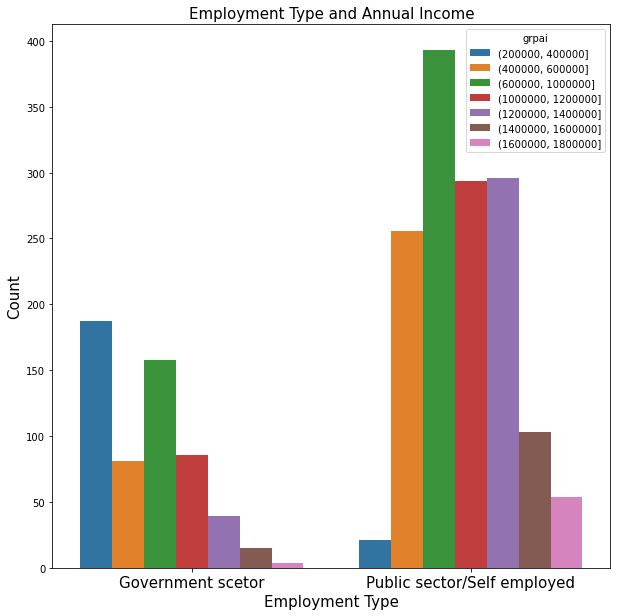

In [31]:
plt.figure(figsize=(10,10))
sns.countplot('Employment Type', hue = 'grpai', data = df)
plt.xlabel('Employment Type', fontsize = 15)
plt.ylabel('Count',  fontsize = 15)
plt.title('Employment Type and Annual Income', fontsize = 15)
x = plt.gca()
x.set_xticklabels(['Government scetor', 'Public sector/Self employed'], fontsize = 15)
plt.show()

Public sector/self employed people earning more annual income  

# Employment Type and EverTravelledAbroad

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


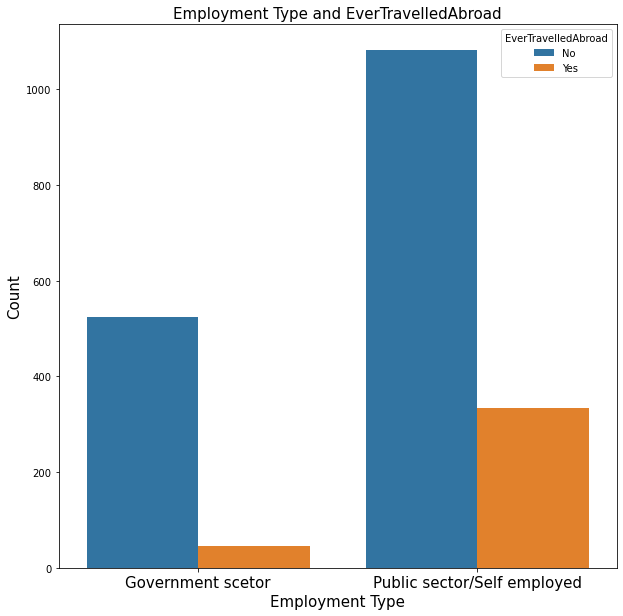

In [32]:
plt.figure(figsize=(10,10))
sns.countplot('Employment Type', hue = 'EverTravelledAbroad', data = df)
plt.xlabel('Employment Type', fontsize = 15)
plt.ylabel('Count',  fontsize = 15)
plt.title('Employment Type and EverTravelledAbroad', fontsize = 15)
x = plt.gca()
x.set_xticklabels(['Government scetor', 'Public sector/Self employed'], fontsize = 15)
plt.show()

we can say that public sector people are they travel abroad more and more they travel for first time 

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


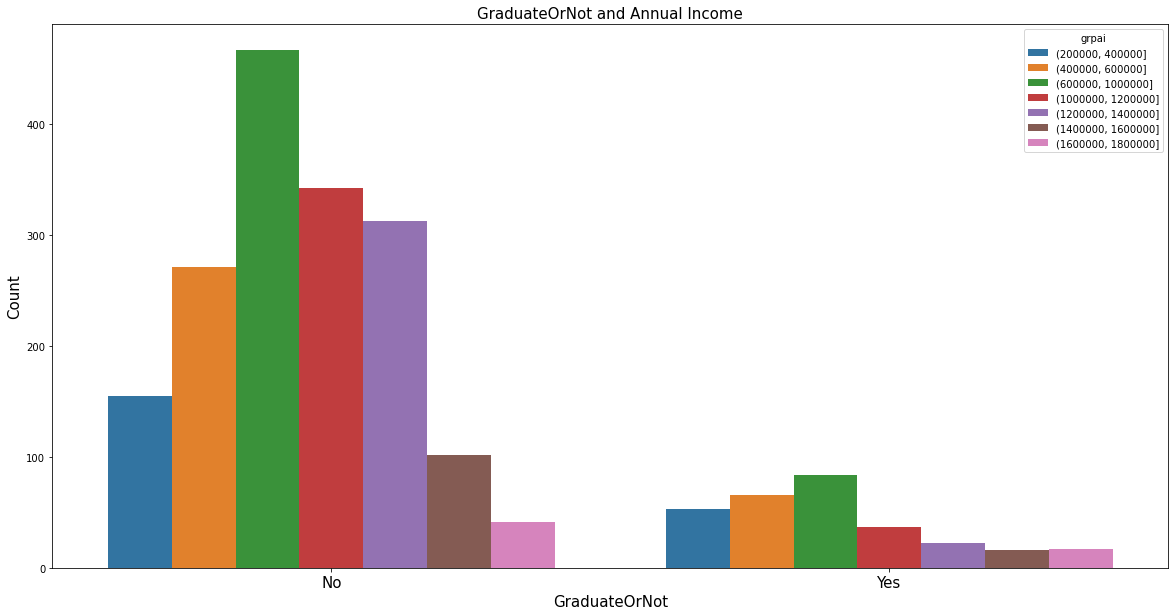

In [33]:
plt.figure(figsize=(20,10))
sns.countplot('GraduateOrNot', hue = 'grpai', data = df)
plt.xlabel('GraduateOrNot', fontsize = 15)
plt.ylabel('Count',  fontsize = 15)
plt.title('GraduateOrNot and Annual Income', fontsize = 15)
x = plt.gca()
x.set_xticklabels(['No', 'Yes'], fontsize = 15)
plt.show()

We can say that graduated people earn more

# Observation from graph

Those who are earning high annaual income are having higher chance of getting travel insurance

The public sector employer's are earning more than government sector employer's

Non-frequrnt flyer have some chance of getting travel insurance then frequent flyer

public sector employer's are high in both frequent flyer and non-frequent flyer  

Those travelling frist abroad has some chance of getting travel insurance than those who travel abroad frequently

public sector people are high number of travelling for the first time to abroad and also frequent travellers

we can also see that graduated people earning high annual income

The non-ChronicDiseases people get higher chance for travel insurance 


# Changing the categorical features into discrete values

In [34]:
df['Employment Type'] = df['Employment Type'].replace({'Government Sector':1, 'Private Sector/Self Employed':2})
df['GraduateOrNot']  = df['GraduateOrNot'].replace({'Yes': 1, 'No' : 0})
df['FrequentFlyer']  = df['FrequentFlyer'].replace({'Yes':1, 'No': 0})
df['EverTravelledAbroad'] = df['EverTravelledAbroad'].replace({'Yes':1, 'No': 0})
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,grpai
0,31,1,1,400000,6,1,0,0,0,"(200000, 400000]"
1,31,2,1,1250000,7,0,0,0,0,"(1200000, 1400000]"
2,34,2,1,500000,4,1,0,0,1,"(400000, 600000]"
3,28,2,1,700000,3,1,0,0,0,"(600000, 1000000]"
4,28,2,1,700000,8,1,1,0,0,"(600000, 1000000]"


# Separating dependent and independent features

In [35]:
x = df.drop(['TravelInsurance','grpai'], axis = 1)
y = df['TravelInsurance']

print('The shape of independent feratures',x.shape)
print('The shape of dependent feratures', y.shape)

The shape of independent feratures (1987, 8)
The shape of dependent feratures (1987,)


# checking for class count

In [36]:
y.value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

As i said in the starting the dataset is imbalanced

# Balancing the dataset by using imblearn over sampling

In [37]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler()
x_res,y_res = os.fit_resample(x,y)

The imblearn over sample the data 

In [38]:
print('x_Shape',x_res.shape)
print('Y_shape',y_res.shape)

x_Shape (2554, 8)
Y_shape (2554,)


The over sample made both the class equale by increase the minority class

In [39]:
y_res.value_counts()

1    1277
0    1277
Name: TravelInsurance, dtype: int64

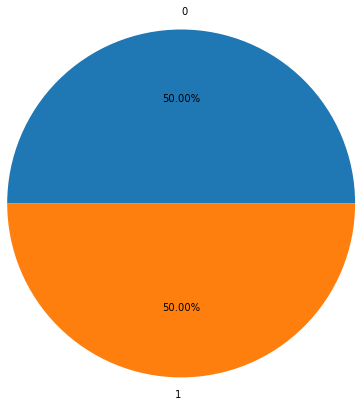

In [40]:
plt.pie(x = y_res.value_counts(), labels = [0,1], autopct = "%0.2f%%", radius = 2)
plt.show()

We can see that the dataset is balanced 

# Feature normaling 

Using Standard normal distribution 

In [41]:
x = (x_res - x_res.mean())/x_res.std()

In [42]:
x = x.values
y = y_res.values

# Splitting Training and Validation dataset

90% to the Training dataset

10% to the validation dataset

In [43]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size = 0.1, random_state = 10, stratify=y)

In [44]:
x_train.shape

(2298, 8)

In [45]:
y_train.shape

(2298,)

In [46]:
x_val.shape

(256, 8)

In [47]:
y_val.shape

(256,)

# Machine Learning model

I am using logistics regression, SVM and Neural Network 

# Logistic Regression

In [48]:
model_log = LogisticRegression(max_iter = 150, C = 1000)
model_log.fit(x_train,y_train)



LogisticRegression(C=1000, max_iter=150)

In [49]:
model_log.score(x_train,y_train)

0.7158398607484769

In [50]:
model_log.score(x_val,y_val)

0.71875

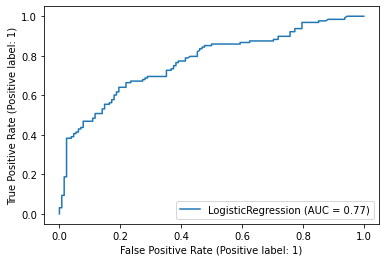

In [51]:
metrics.plot_roc_curve(model_log, x_val, y_val)

In [52]:
print('classification_report: \n',metrics.classification_report(y_val, model_log.predict(x_val)))

classification_report: 
               precision    recall  f1-score   support

           0       0.69      0.78      0.74       128
           1       0.75      0.66      0.70       128

    accuracy                           0.72       256
   macro avg       0.72      0.72      0.72       256
weighted avg       0.72      0.72      0.72       256



The logistic regression gives the accuracy of validation set 70%

There no overfitting problem

c or 1/lambda = 1000 (where lambda = 0.001)

max_iter = 150

There is a Underfitting problem 

solution for underfitting is to add new features or polynomial function 



C:\Anaconda\lib\site-packages\seaborn\matrix.py:265: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(x, y, annotation, **text_kwargs)


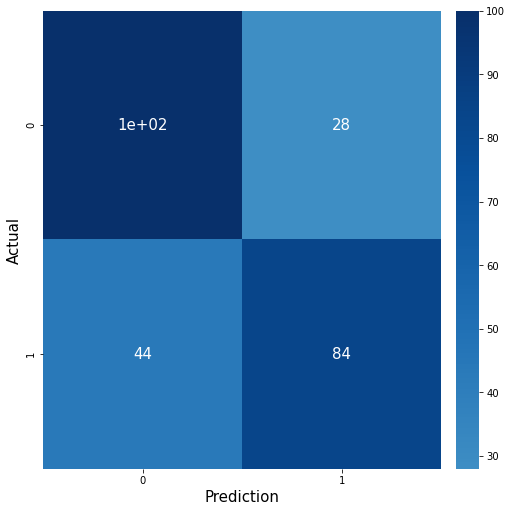

In [53]:
from sklearn.metrics import confusion_matrix, plot_precision_recall_curve

log = confusion_matrix(y_val, model_log.predict(x_val))
fig, ax = plt.subplots(1,1, figsize = (7,7), constrained_layout = True)

sns.heatmap(log, annot = True, cmap = 'Blues', ax = ax, center = 0, annot_kws={'fontsize': 15, 'Label': ['TN', 'Fp', 'FN', 'TP']})
ax.set_ylabel('Actual', fontsize = 15)
ax.set_xlabel('Prediction', fontsize = 15)
plt.show()

True positive = 79

True Negative = 99

False Postive = 29

False Negative  = 49


False Negative is higher than Flase postive then we should focuse more on Recall

In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision  = precision_score(y_val, model_log.predict(x_val))
 
recall = recall_score(y_val, model_log.predict(x_val))

f1_score = f1_score(y_val, model_log.predict(x_val))

df_metrics = pd.DataFrame({'Precision': [precision], "Recall": [recall], 'F1_score': [f1_score]})
df_metrics

,Precision,Recall,F1_score
0,0.75,0.65625,0.7


We can see that recall is low only 61% 

# SVM

The reason for using the SVM is that it has modified costfunction

where 

y = 1 if theta.T(x) >= 1

y = 0 if thetaq.T(x) <= -1

SVM use large margin separation 

C = 1/Lambda 

if c is large overfit

if c is too small underfit

In [55]:
model_svc = SVC(C = 1000)
model_svc.fit(x_train,y_train)

SVC(C=1000)

In [56]:
model_svc.score(x_train,y_train)

0.8607484769364665

In [57]:
model_svc.score(x_val,y_val)

0.73046875

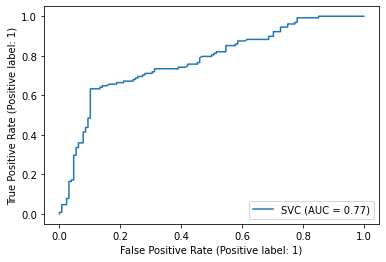

In [58]:
metrics.plot_roc_curve(model_svc, x_val, y_val)

In [59]:
print('classification_report: \n',metrics.classification_report(y_val, model_svc.predict(x_val)))

classification_report: 
               precision    recall  f1-score   support

           0       0.71      0.79      0.75       128
           1       0.76      0.67      0.71       128

    accuracy                           0.73       256
   macro avg       0.73      0.73      0.73       256
weighted avg       0.73      0.73      0.73       256



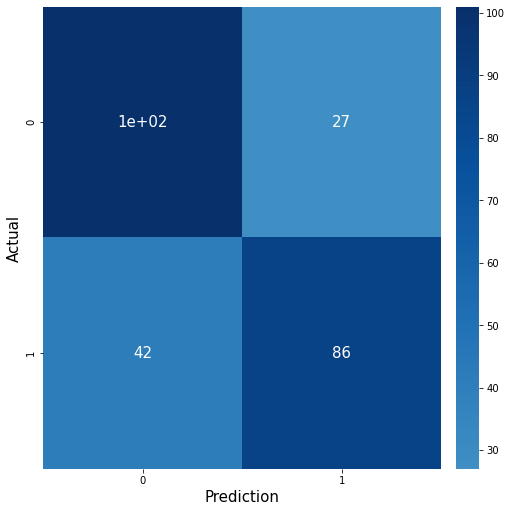

In [60]:
svc = confusion_matrix(y_val, model_svc.predict(x_val))
fig, ax = plt.subplots(1,1, figsize = (7,7), constrained_layout = True)

sns.heatmap(svc, annot = True, cmap = 'Blues', ax = ax, center = 0, annot_kws={'fontsize': 15})
ax.set_ylabel('Actual', fontsize = 15)
ax.set_xlabel('Prediction', fontsize = 15)
plt.show()

In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision  = precision_score(y_val, model_svc.predict(x_val))
 
recall = recall_score(y_val, model_svc.predict(x_val))

f1_score = f1_score(y_val, model_svc.predict(x_val))

df_metrics_svc = pd.DataFrame({'Precision': [precision], "Recall": [recall], 'F1_score': [f1_score]})
df_metrics_svc

,Precision,Recall,F1_score
0,0.761062,0.671875,0.713693


Compare to logistic regression, SVM is doing well

The precision and recall are ok when compare to logistic regression

accuracy of valdiation data = 75%

Flase Neagative is 37 is 10% higher then Flase positive

True positive = 91

True Negative = 100

False Postive = 27

False Negative  = 37


# Neural Network

I usually use Neauarl Network

because it can be used when there is higher number of features 

neural network learn more complex featues from input

Here 

input layer with activation function relu where it avoids the slop leads to zero when Z is highe and lower

2 Hidden layer same relu activation

1 output layer activation sigmoid because this problem is binary class

lambda = 0.001

epochs (iteration) = 150

optimizer = Adam because it has both advantages of RMs and gradient descent with momentum

loss = binary_crossentropy



In [62]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(212, input_shape=(8,),activation = 'relu', kernel_regularizer = tf.keras.regularizers.L2(0.001)),
                                   tf.keras.layers.Dense(121, activation = 'relu', kernel_regularizer = tf.keras.regularizers.L2(0.001)),
                                   tf.keras.layers.Dense(10, activation = 'relu', kernel_regularizer = tf.keras.regularizers.L2(0.001)),
                                   tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_regularizer = tf.keras.regularizers.L2(0.001))])


model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = 'adam', metrics = ['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 212)               1908      
_________________________________________________________________
dense_1 (Dense)              (None, 121)               25773     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1220      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 28,912
Trainable params: 28,912
Non-trainable params: 0
_________________________________________________________________


In [63]:
geo = model.fit(x_train,y_train, validation_data = (x_val,y_val), epochs = 150)

Epoch 1/150
72/72 [==============================] - 2s 15ms/step - loss: 0.7838 - accuracy: 0.6681 - val_loss: 0.6680 - val_accuracy: 0.7344
Epoch 2/150
72/72 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.7528 - val_loss: 0.6239 - val_accuracy: 0.7422
Epoch 3/150
72/72 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.7575 - val_loss: 0.6168 - val_accuracy: 0.7578
Epoch 4/150
72/72 [==============================] - 0s 2ms/step - loss: 0.5953 - accuracy: 0.7465 - val_loss: 0.6005 - val_accuracy: 0.7461
Epoch 5/150
72/72 [==============================] - 0s 2ms/step - loss: 0.5767 - accuracy: 0.7583 - val_loss: 0.5926 - val_accuracy: 0.7539
Epoch 6/150
72/72 [==============================] - 0s 2ms/step - loss: 0.5524 - accuracy: 0.7601 - val_loss: 0.5833 - val_accuracy: 0.7383
Epoch 7/150
72/72 [==============================] - 0s 2ms/step - loss: 0.5388 - accuracy: 0.7653 - val_loss: 0.5878 - val_accuracy: 0.7578
Epoch 8/150


Epoch 59/150
72/72 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.8135 - val_loss: 0.5889 - val_accuracy: 0.7461
Epoch 60/150
72/72 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.8255 - val_loss: 0.5924 - val_accuracy: 0.7461
Epoch 61/150
72/72 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.8331 - val_loss: 0.5840 - val_accuracy: 0.7461
Epoch 62/150
72/72 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.8313 - val_loss: 0.5988 - val_accuracy: 0.7383
Epoch 63/150
72/72 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.8160 - val_loss: 0.6020 - val_accuracy: 0.7422
Epoch 64/150
72/72 [==============================] - 0s 2ms/step - loss: 0.4449 - accuracy: 0.8189 - val_loss: 0.5940 - val_accuracy: 0.7656
Epoch 65/150
72/72 [==============================] - 0s 2ms/step - loss: 0.4363 - accuracy: 0.8245 - val_loss: 0.6203 - val_accuracy: 0.7422
Epoch 

72/72 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.8544 - val_loss: 0.6178 - val_accuracy: 0.7070
Epoch 117/150
72/72 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8279 - val_loss: 0.6323 - val_accuracy: 0.7305
Epoch 118/150
72/72 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.8502 - val_loss: 0.6427 - val_accuracy: 0.7188
Epoch 119/150
72/72 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.8393 - val_loss: 0.6134 - val_accuracy: 0.7188
Epoch 120/150
72/72 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.8438 - val_loss: 0.6354 - val_accuracy: 0.7539
Epoch 121/150
72/72 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.8393 - val_loss: 0.6169 - val_accuracy: 0.7422
Epoch 122/150
72/72 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.8555 - val_loss: 0.6397 - val_accuracy: 0.7031
Epoch 123/150

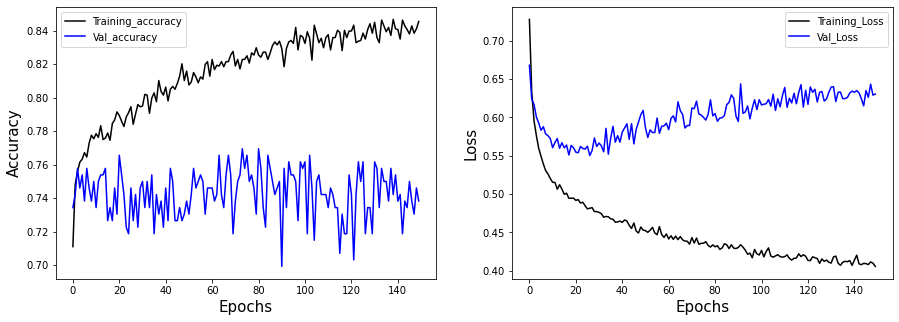

In [64]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
train_acc = geo.history['accuracy']
val_acc = geo.history['val_accuracy']
epoch = range(len(train_acc))
plt.plot(epoch, train_acc, color ='k', label='Training_accuracy')
plt.plot(epoch, val_acc, color = 'b', label = 'Val_accuracy')
plt.legend(loc='best')
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)


plt.subplot(1,2,2)
train_loss = geo.history['loss']
val_loss = geo.history['val_loss']
plt.plot(epoch, train_loss, color ='k', label='Training_Loss')
plt.plot(epoch, val_loss, color = 'b', label = 'Val_Loss')
plt.legend(loc='best')
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.show()

In [65]:
model = model.evaluate(x_val, y_val)

8/8 [==============================] - 0s 1ms/step - loss: 0.6305 - accuracy: 0.7383


so use SVM and Neural Network they are better for this usecase